In [1]:
from typing import Annotated

DataList = Annotated[list[float], 49]

fish_length: DataList = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight: DataList = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 데이터 정제하고 분류 개수 지정
fish_data: list[list[float]] = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target: list[int] = [1]*35 + [0]*14

**훈련 세트(train set)**: 훈련에 사용하는 데이터\
**테스트 세트(test set)**: 평가에 사용하는 데이터\
**샘플**: 각각의 데이터

In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

train_input, train_target = fish_data[:35], fish_target[:35]
test_input, test_target = fish_data[35:], fish_target[35:]

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target) # 이렇게 하면 안 됨. 훈련 세트에 도미만 있잖니.

0.0

**샘플링 편향(sampling bias)**: 샘플링이 한 쪽으로 치우쳐짐. 이 경우 제대로 된 지도학습 모델 훈련 불가능.

In [5]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr.shape)

(49, 2)


In [17]:
np.random.seed() # 시드는 마음대로
index = np.arange(49) # [0, 49) 구간에서 1씩 증가하는 인덱스 생성
np.random.shuffle(index)

index

array([42, 10, 36,  3, 48, 14, 16, 46, 39, 13, 11, 31, 37, 32, 22,  8, 35,
       34, 29, 26, 43, 44,  5, 24, 20,  0,  6,  4, 33, 21, 45, 27,  2, 19,
        1, 23, 40, 30,  7, 41, 18, 15, 38, 12, 17, 47,  9, 25, 28])

In [7]:
print(input_arr[[1, 3]]) # 2번째, 4번째 샘플 동시 선택

[[ 26.3 290. ]
 [ 29.  363. ]]


In [18]:
# 리스트 대신 넘파이 배열 인덱스로 전달. 랜덤하게 35개 선택
print(index[:35])
train_input, train_target = input_arr[index[:35]], target_arr[index[:35]]
test_input, test_target = input_arr[index[35:]], target_arr[index[35:]]

[42 10 36  3 48 14 16 46 39 13 11 31 37 32 22  8 35 34 29 26 43 44  5 24
 20  0  6  4 33 21 45 27  2 19  1]


[11.8 31.  10.5 29.  15.  32.  33.  13.  11.2 32.  31.  38.5 10.6 39.5
 34.5 30.   9.8 41.  37.  35.  12.  12.2 29.7 35.  34.  25.4 29.7 29.
 41.  34.  12.4 36.  26.5 33.5 26.3]


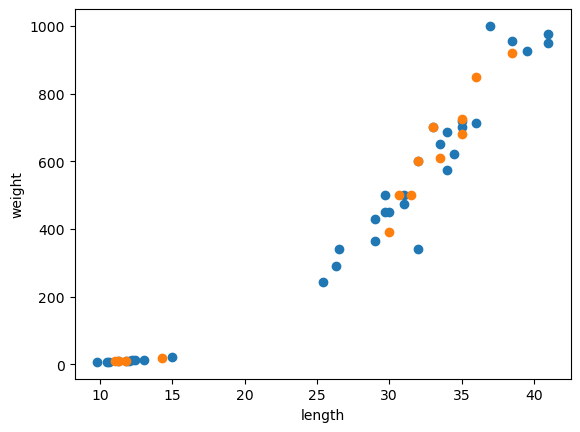

In [19]:
import matplotlib.pyplot as plt

print(train_input[:, 0])
plt.scatter(train_input[:, 0], train_input[:, 1]) # 2차원 배열의 슬라이싱
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0